In [1]:
import pandas as pd

In [2]:
file_path = 'diabetes.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Check for missing values in the dataset
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Summary statistics to understand the distribution of numerical features
summary_statistics = data.describe()
summary_statistics

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Exploratory Data Analysis (EDA)

**Handling Missing Values**

In [8]:
# Check for zero values in relevant columns that might indicate missing data
columns_with_potential_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
zero_values = (data[columns_with_potential_missing] == 0).sum()

zero_values

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [9]:
# Impute missing values (zeros) with the median of each column
data[columns_with_potential_missing] = data[columns_with_potential_missing].replace(0, data[columns_with_potential_missing].median())

# Verify that there are no more zero values in these columns
(data[columns_with_potential_missing] == 0).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

**Handling Outliers**

In [10]:
import matplotlib.pyplot as plt

In [11]:
# Features to check for outliers
features_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 
                     'SkinThickness', 'Insulin', 'BMI', 
                     'DiabetesPedigreeFunction', 'Age']

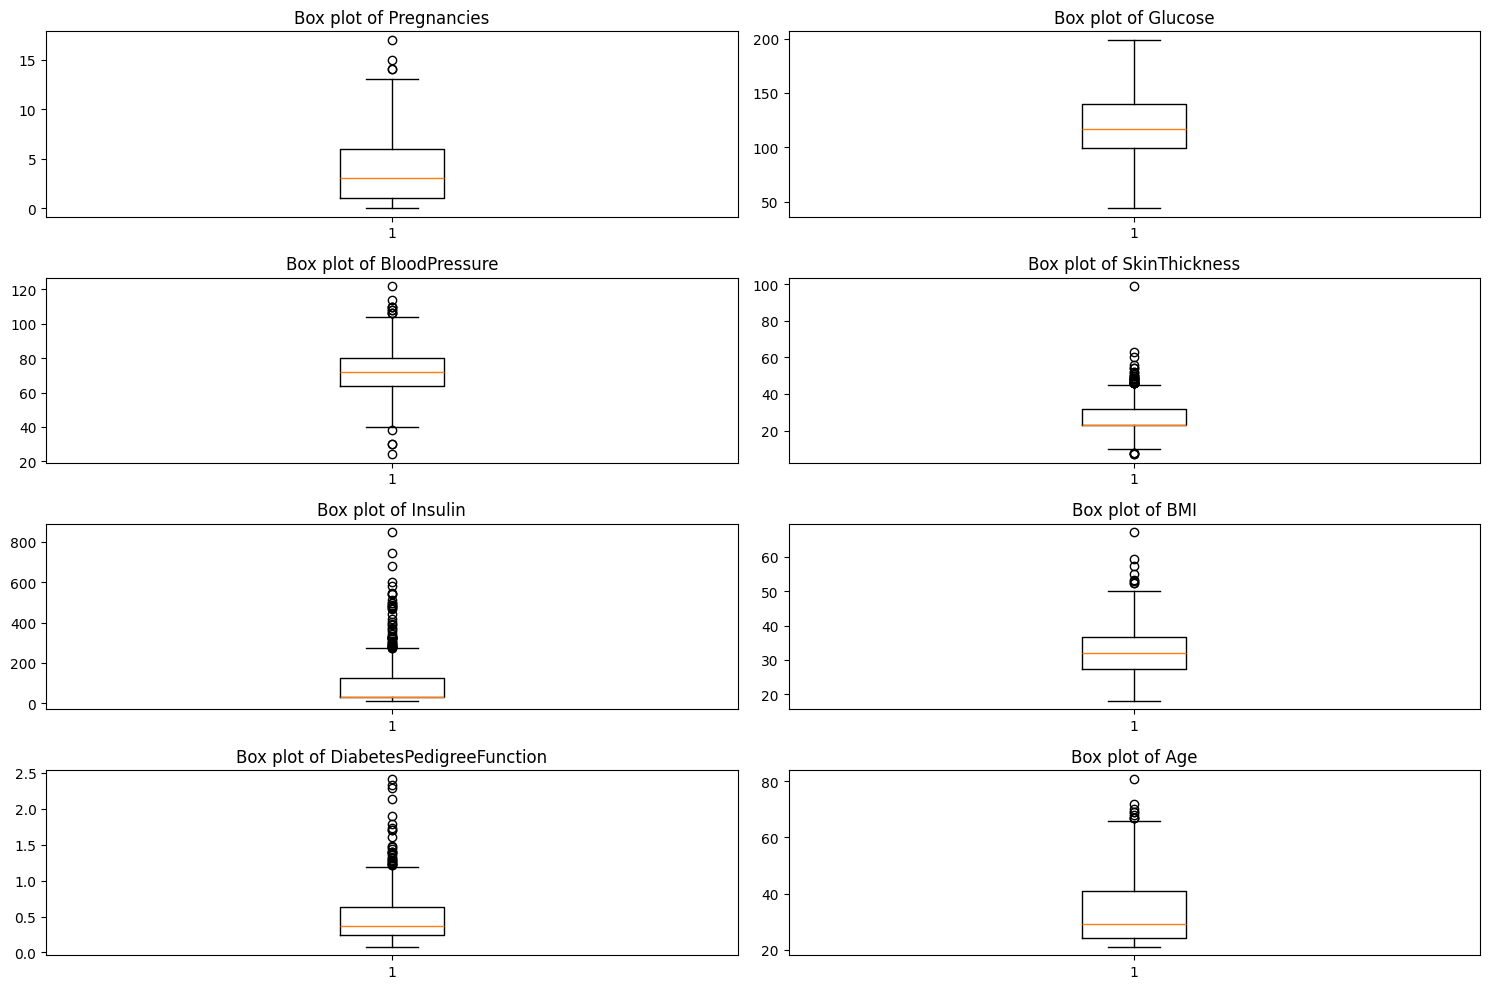

In [12]:
# Create box plots to visualize potential outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_check, 1):
    plt.subplot(4, 2, i)
    plt.boxplot(data[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

**Summary of the findings:**

1. Pregnancies: There are several outliers, particularly at higher values. This is expected since some women may have a significantly higher number of pregnancies than average.
2. Glucose: There are a few outliers, but the distribution seems relatively normal, with most values falling within a reasonable range.
3. BloodPressure: Several outliers are present, particularly at the lower end. Some of these might be extreme, but it's important to consider the medical context before removing them.
4. SkinThickness: This feature shows a large number of outliers, especially at lower values. This may require further investigation to ensure accurate measurement.
5. Insulin: There are a significant number of outliers, especially at higher values. Insulin levels can vary greatly, but extreme values could affect model performance.
6. BMI: There are a few outliers at higher BMI levels, but the distribution is fairly concentrated in the middle range.
7. DiabetesPedigreeFunction: This feature has a relatively wide distribution, with several outliers. Since this is a calculated value, outliers could still be meaningful, depending on family history.
8. Age: There are some outliers at higher ages, but this is to be expected in a diverse dataset.

**Approach to Handling Outliers:**

1. **Keep Medically Significant Outliers:** Leave outliers in features like Glucose, BloodPressure, BMI, and Insulin as they might indicate important medical conditions.
2. **Capping Outliers for Certain Features:** Cap features like Pregnancies and Age to reasonable values.

In [13]:
import numpy as np

In [14]:
# Cap Pregnancies at 15 (assuming values above this are rare but possible)
data['Pregnancies'] = np.where(data['Pregnancies'] > 15, 15, data['Pregnancies'])

In [15]:
# Cap Age at 80 (higher values are still valid but less common)
data['Age'] = np.where(data['Age'] > 80, 80, data['Age'])

**Apply a log transformation** to the features Insulin and DiabetesPedigreeFunction to reduce skewness.

In [16]:
# Adding a small constant (1) to avoid log(0)
data['Insulin'] = np.log1p(data['Insulin'])
data['DiabetesPedigreeFunction'] = np.log1p(data['DiabetesPedigreeFunction'])

In [17]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.842448,121.656250,72.386719,27.334635,4.152040,32.450911,0.365317,33.239583,0.348958
std,3.360158,30.438286,12.096642,9.229014,0.844576,6.875366,0.198510,11.754991,0.476951
min,0.000000,44.000000,24.000000,7.000000,2.708050,18.200000,0.075107,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,3.449988,27.500000,0.218131,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,3.473248,32.000000,0.316633,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,4.853976,36.600000,0.486277,41.000000,1.000000
max,15.000000,199.000000,122.000000,99.000000,6.741701,67.100000,1.229641,80.000000,1.000000


**Visualizing the relationships between variables**

In [18]:
import seaborn as sns

**Scatter Plot:** To visualize the relationship between two important features (e.g., Glucose and BMI) and color by the Outcome variable.

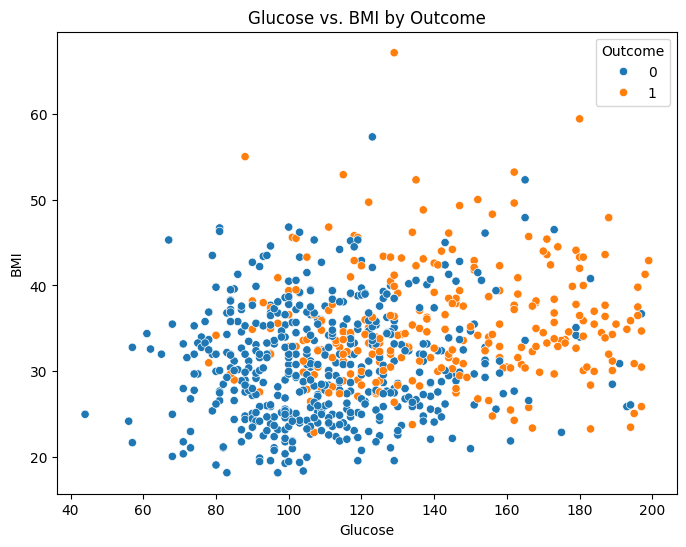

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=data)
plt.title('Glucose vs. BMI by Outcome')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

**Histogram:** To show the distribution of individual features, like Glucose, Age, and Blood Pressure.

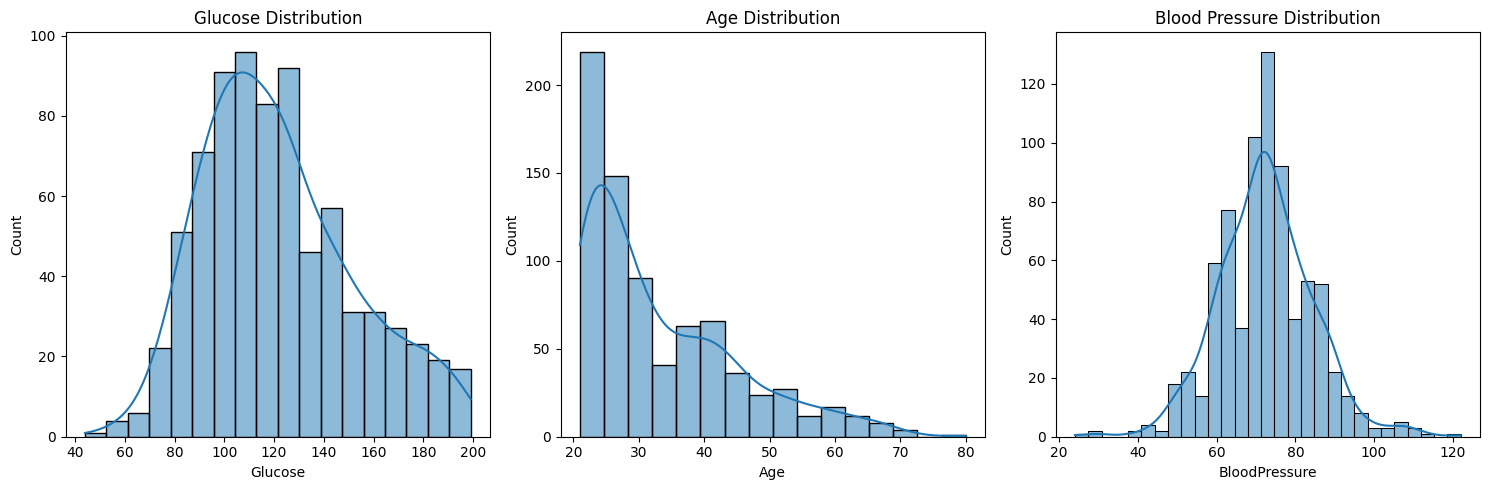

In [20]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['Glucose'], kde=True)
plt.title('Glucose Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['BloodPressure'], kde=True)
plt.title('Blood Pressure Distribution')

plt.tight_layout()
plt.show()

**Box Plot:** To compare distributions of features like Glucose or BMI across the two Outcome groups (diabetes vs. non-diabetes).

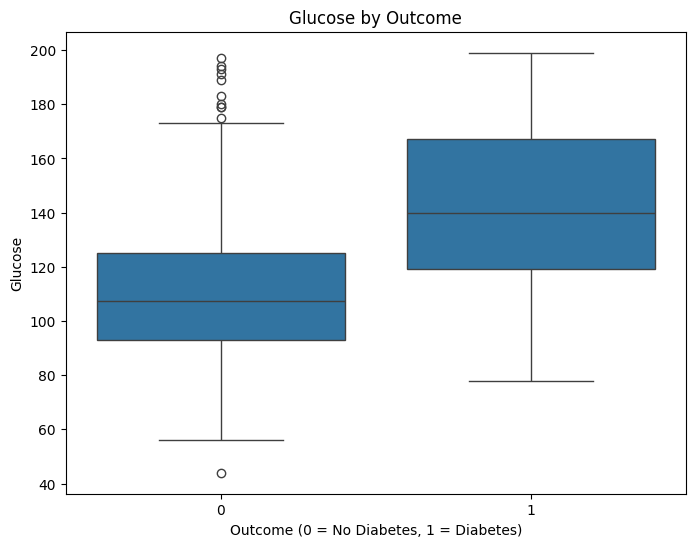

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Glucose by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Glucose')
plt.show()

**Observations:**
1. Glucose appears to be a stronger indicator of diabetes than BMI based on the scatter plot.
2. BMI alone doesn’t provide a clear distinction between the two outcome groups, though extremely high values may still indicate higher risk.

**Histogram of Glucose by Outcome:**
This will help us see how Glucose levels are distributed in both diabetes-positive (Outcome = 1) and diabetes-negative (Outcome = 0) individuals.

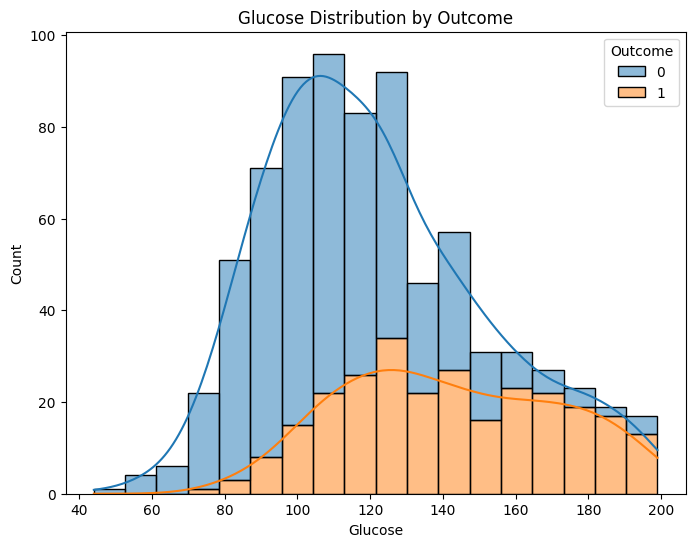

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Glucose', hue='Outcome', kde=True, multiple='stack')
plt.title('Glucose Distribution by Outcome')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.show()

1. **Observation:** The histogram shows a clear distinction between the two groups:
- The blue distribution (Outcome = 0, no diabetes) peaks around 100 for Glucose and tapers off as glucose levels increase.
- The orange distribution (Outcome = 1, diabetes) has more individuals with Glucose levels above 120, with many individuals having glucose levels above 140.
2. **Insight:** Higher glucose levels are strongly associated with diabetes. This supports the earlier finding that Glucose is one of the strongest indicators of diabetes in this dataset.

**Boxplot of BMI by Outcome:**
A boxplot to visualize the distribution of BMI across the two outcome groups (diabetes vs. non-diabetes).

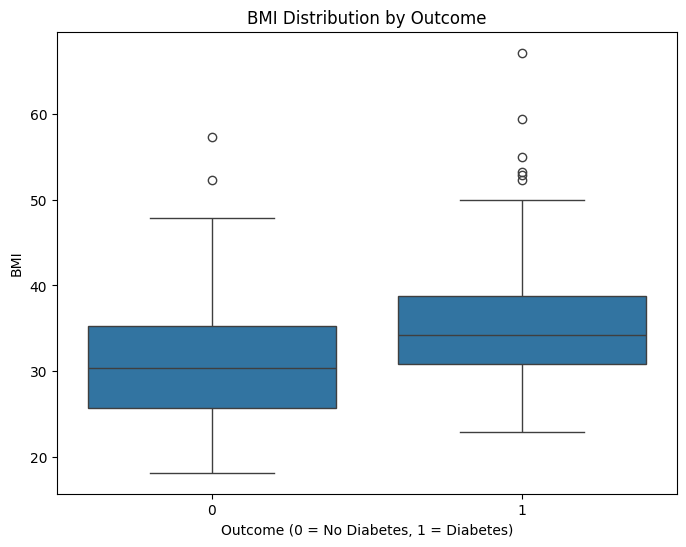

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BMI', data=data)
plt.title('BMI Distribution by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('BMI')
plt.show()

1. **Observation:**
- Both groups (Outcome = 0 and Outcome = 1) show a similar median BMI, but there are slightly higher values for those with diabetes (Outcome = 1).
- There are some outliers in both groups, especially in the diabetes-positive group (Outcome = 1), where several individuals have BMI values above 50.

2. **Insight:** While the median BMI is similar between the two groups, individuals with very high BMI values (outliers) tend to be in the diabetes-positive group. This suggests that while BMI alone may not be a strong predictor, extreme values could still be a factor in diabetes risk.

**Conclusion:**
- **Glucose** appears to be a very strong indicator of diabetes, with a clear difference between the distributions of individuals with and without diabetes.
- **BMI** shows some distinction, especially for outliers, but the overall distribution is more similar across the two outcome groups.

# Feature Engineering

In [24]:
from sklearn.preprocessing import StandardScaler

Categories based on standard BMI ranges: **<18.5 (underweight), 18.5-24.9 (normal), 25-29.9 (overweight), >=30 (obese)**

In [25]:
# Create new BMI categories
data['BMI_Category'] = pd.cut(data['BMI'], bins=[-np.inf, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal', 
                                                                                             'Overweight', 'Obese'])

Define age groups: **21-30 (Young), 31-50 (Middle-Aged), 51+ (Senior)**

In [26]:
# Create Age groups
data['Age_Group'] = pd.cut(data['Age'] * 11.76 + 33.24, bins=[20, 30, 50, np.inf], labels=['Young', 'Middle-Aged', 'Senior'])

In [27]:
numerical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Pregnancies']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

1. **Scale Numerical Features:** Standardize the continuous variables (e.g., Glucose, BloodPressure, BMI) to ensure they are on the same scale.

In [28]:
# Scale numerical features
numerical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 
                      'Insulin', 'BMI', 'DiabetesPedigreeFunction', 
                      'Age', 'Pregnancies']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [29]:
# Display the first few rows to check the new features
data[['BMI', 'BMI_Category', 'Age', 'Age_Group']].head()

,BMI,BMI_Category,Age,Age_Group
0,0.167240,Obese,1.426742,Senior
1,-0.851551,Overweight,-0.190646,Senior
2,-1.331838,Normal,-0.105520,Senior
3,-0.633239,Overweight,-1.041903,Senior
4,1.549885,Obese,-0.020395,Senior


**Summary of Feature Engineering:**
1. **BMI Category:** Successfully created categorical labels based on BMI thresholds (Underweight, Normal, Overweight, Obese).
2. **Age Group:** Successfully grouped individuals into Young, Middle-Aged, and Senior categories.
3. **Numerical Scaling:** Features like Glucose, BloodPressure, and BMI have been scaled properly using ""**StandardScaler**"".

# Data Preprocessing

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter

In this step, we’ll **prepare the data for machine learning** by:

1. **Splitting the data** into training and testing sets.
2. **Handling class imbalance**.
3. **Ensuring data is clean** and ready for model building.

- **Splitting the Data:**
We will use an **80/20 split** for **training and testing** sets to ensure enough data for model training and evaluation.

In [31]:
# Prepare features and target variable
X = data.drop(columns=['Outcome', 'BMI_Category', 'Age_Group'])  # Drop categorical features that were engineered for interpretation
y = data['Outcome']

- **Outcome** is dropped because it is the target variable.
- **BMI_Category** and **Age_Group** are dropped because they are categorical and redundant, as we already have their continuous counterparts (scaled BMI and Age).

In [32]:
# Split data into training (80%) and test sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
# Check for class imbalance in the target variable
class_distribution = Counter(y_train)
print("Class distribution in training data:", class_distribution)

Class distribution in training data: Counter({0: 400, 1: 214})


- **400 samples** belong to class 0 (no diabetes).
- **214 samples** belong to class 1 (diabetes).

This means that approximately **65%** of the training data is non-diabetic (class 0), while **35%** is diabetic (class 1). This imbalance is not extreme, but it could still affect the model's performance, especially in terms of recall and precision for the minority class (diabetes-positive individuals).

# Model Building

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

We will start by building a baseline model **without handling the class imbalance**. 

1. We’ll use **Logistic Regression** as a starting point.
2. **Evaluate its performance** using metrics like accuracy, precision, recall, and F1-score to understand how well the model performs, especially for the minority class (diabetes-positive individuals).

In [35]:
# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [36]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [37]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [38]:
# Display the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.69
Precision: 0.58
Recall: 0.48
F1-Score: 0.53


**Key Metrics:**
1. **Accuracy: 0.69**
- This means the model is correct about 69% of the time. However, since there is a class imbalance, accuracy alone isn't the best measure of performance.

2. **Precision: 0.58** for Class 1 (diabetes-positive)
- When the model predicts someone has diabetes (class 1), it is correct 58% of the time.

3. **Recall: 0.48** for Class 1
- The model only detects 48% of the actual diabetes cases. This means the model is missing a significant number of true diabetes-positive cases, which is concerning for this type of problem.

4. **F1-Score: 0.53** for Class 1
- The F1-score balances precision and recall. A score of 0.53 indicates that the model's performance in predicting diabetes-positive cases is not very strong.

**Confusion Matrix and Classification Report**

In [39]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[81 19]
 [28 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       100
           1       0.58      0.48      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



**Confusion Matrix:**
- **True Negatives (81):** Correctly predicted no diabetes.
- **False Positives (19):** Predicted diabetes when the person does not have it.
- **False Negatives (28):** Predicted no diabetes when the person actually has it (this is particularly concerning).
- **True Positives (26):** Correctly predicted diabetes.

**Analysis:**
- The model performs better for class 0 (no diabetes), with a precision of 0.74 and recall of 0.81, but it struggles to accurately predict class 1 (diabetes-positive) cases.
- The low recall (0.48) for class 1 indicates that the model misses many actual cases of diabetes, which is crucial for healthcare scenarios where identifying all cases of a condition is important.

# _______________________________________________________

Let's try the **Random Forest Classifier Model** as it can handle imbalanced data reasonably well. If it performs well, we can compare the results with **Logistic Regression**.

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [41]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [43]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [44]:
# Display the results
print(f"Accuracy (Random Forest): {accuracy_rf:.2f}")
print(f"Precision (Random Forest): {precision_rf:.2f}")
print(f"Recall (Random Forest): {recall_rf:.2f}")
print(f"F1-Score (Random Forest): {f1_rf:.2f}")

Accuracy (Random Forest): 0.75
Precision (Random Forest): 0.67
Recall (Random Forest): 0.57
F1-Score (Random Forest): 0.62


**Key Metrics:**
1. **Accuracy: 0.75**
- The model correctly classified 75% of the instances, which is a noticeable improvement over Logistic Regression’s accuracy of 0.69.

2. **Precision for Class 1 (Diabetes): 0.67**
- When the Random Forest model predicted diabetes, it was correct 67% of the time. This is an improvement from 58% with Logistic Regression.

3. **Recall for Class 1 (Diabetes): 0.57**
- The model detected 57% of the actual diabetes-positive cases, an improvement from 48% recall in Logistic Regression.

4. **F1-Score for Class 1: 0.62**
- The F1-score, which balances precision and recall, improved to 0.62, compared to 0.53 for Logistic Regression.

**Confusion Matrix and Classification Report**

In [45]:
print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Confusion Matrix (Random Forest):
[[85 15]
 [23 31]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57      0.62        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



**Confusion Matrix:**
- **True Negatives (85):** Correctly predicted no diabetes.
- **False Positives (15):** Predicted diabetes when the person did not have it.
- **False Negatives (23):** Predicted no diabetes when the person actually had it.
- **True Positives (31):** Correctly predicted diabetes.

**Conclusion:**
- The Random Forest model performs better than Logistic Regression in terms of both precision and recall for predicting diabetes-positive cases.
- It may still miss some true diabetes cases (False Negatives), but it's performing much better than the logistic regression model in terms of detecting the minority class (class 1).

# Apply SMOTE to Random Forest

**SMOTE** generates synthetic examples (new data points) for the minority class by interpolating between existing data points in that class. It does this by:

1. **Selecting Random Data Points:** SMOTE first selects a random point from the minority class.
2. **Choosing Nearest Neighbors:** It then finds the nearest neighbors (typically 5) of that selected point within the minority class.
3. **Creating Synthetic Samples:** SMOTE generates synthetic data points by interpolating between the selected point and one of its nearest neighbors. The new synthetic points are created along the line connecting the original data point to its neighbors.

This helps to balance the dataset by adding synthetic samples to the minority class rather than simply duplicating existing samples. The goal is to provide the machine learning model with a more balanced training set, so it doesn't get biased toward the majority class.

**Why SMOTE?**
- While Random Forest is performing well, the class imbalance is still causing the model to miss a significant portion of actual diabetes cases (false negatives). By applying SMOTE, we can oversample the minority class (diabetes-positive) in the training set to help the model learn to detect more diabetes-positive cases.

**Goal:**
- The goal of using SMOTE is to improve the recall for the minority class, thus reducing the number of false negatives and improving the F1-score. This is particularly important in healthcare settings where failing to detect a condition like diabetes can have serious consequences.

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [49]:
# Train the Random Forest model on the balanced data
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [50]:
# Make predictions on the test set
y_pred_rf_smote = rf_model_smote.predict(X_test)

In [51]:
# Evaluate the Random Forest model with SMOTE
accuracy_rf_smote = accuracy_score(y_test, y_pred_rf_smote)
precision_rf_smote = precision_score(y_test, y_pred_rf_smote)
recall_rf_smote = recall_score(y_test, y_pred_rf_smote)
f1_rf_smote = f1_score(y_test, y_pred_rf_smote)

In [52]:
# Display the results
print(f"Accuracy (Random Forest with SMOTE): {accuracy_rf_smote:.2f}")
print(f"Precision (Random Forest with SMOTE): {precision_rf_smote:.2f}")
print(f"Recall (Random Forest with SMOTE): {recall_rf_smote:.2f}")
print(f"F1-Score (Random Forest with SMOTE): {f1_rf_smote:.2f}")

Accuracy (Random Forest with SMOTE): 0.77
Precision (Random Forest with SMOTE): 0.66
Recall (Random Forest with SMOTE): 0.74
F1-Score (Random Forest with SMOTE): 0.70


**Key Metrics (Random Forest with SMOTE):**

1. **Accuracy: 0.77**
- The model correctly classified 77% of the instances, an improvement over the previous model without SMOTE (which had 0.75 accuracy).

2. **Precision for Class 1 (Diabetes): 0.66**
- When the model predicts diabetes, it is correct 66% of the time. This is consistent with the precision of the Random Forest model without SMOTE.

3. **Recall for Class 1 (Diabetes): 0.74**
- The recall for the minority class (diabetes-positive) improved significantly from 0.57 to 0.74. This means the model is now detecting 74% of the actual diabetes cases, reducing the number of missed cases (false negatives).

4. **F1-Score for Class 1: 0.70**
- The F1-score, which balances precision and recall, improved from 0.62 to 0.70. This indicates a better balance between correctly identifying true diabetes cases while maintaining precision.

**Confusion Matrix and Classification Report**

In [53]:
print("\nConfusion Matrix (Random Forest with SMOTE):")
print(confusion_matrix(y_test, y_pred_rf_smote))

print("\nClassification Report (Random Forest with SMOTE):")
print(classification_report(y_test, y_pred_rf_smote))


Confusion Matrix (Random Forest with SMOTE):
[[79 21]
 [14 40]]

Classification Report (Random Forest with SMOTE):
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       100
           1       0.66      0.74      0.70        54

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.78      0.77      0.78       154



- **True Negatives (79):** Correctly predicted no diabetes.
- **False Positives (21):** Predicted diabetes when the person does not have it.
- **False Negatives (14):** Predicted no diabetes when the person actually had it (a significant reduction from 23).
- **True Positives (40):** Correctly predicted diabetes (an increase from 31).

**Analysis:**
- **Recall for class 1 (diabetes-positive)** improved significantly from **0.57 to 0.74**. This means the model is now catching more true cases of diabetes, which is crucial in a healthcare setting.
- **F1-Score** for class 1 also improved from **0.62 to 0.70**, indicating a better balance between precision and recall.
- Overall, the model's performance on the minority class (diabetes-positive) has improved, especially in detecting more true cases.

# Statistical Insights and Interpretation

1. **Feature Importance:** We'll calculate the importance of each feature used in the Random Forest model to understand which factors contribute most to the predictions.
2. **Visualization of Feature Importance:** We'll visualize the feature importance using a bar chart to highlight the most significant predictors of diabetes.
3. **Interpretation of Results:** We'll interpret which features are driving the model and how this aligns with medical knowledge.

In [54]:
# Get feature importances from the Random Forest model
importances = rf_model_smote.feature_importances_
features = X.columns

In [55]:
# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

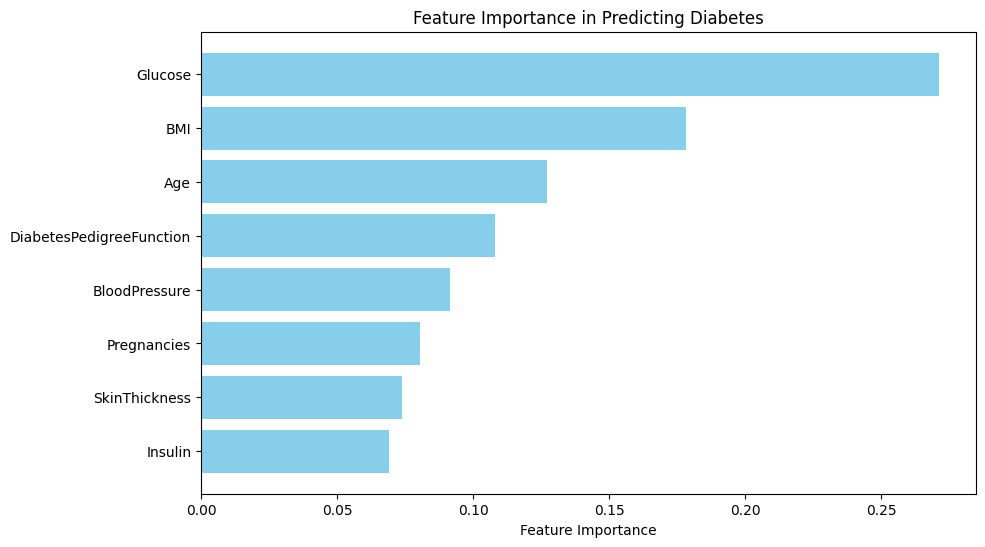

In [56]:
# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Predicting Diabetes')
plt.gca().invert_yaxis()
plt.show()

**Insights:**
- Glucose is clearly the dominant factor in predicting diabetes, which aligns well with our expectations given that glucose regulation is central to the condition.
- BMI and Age are also critical predictors, further supporting the understanding that obesity and aging are key risk factors.
- The model has effectively captured the importance of family history (Diabetes Pedigree Function) and blood pressure, which are additional contributors to diabetes risk.

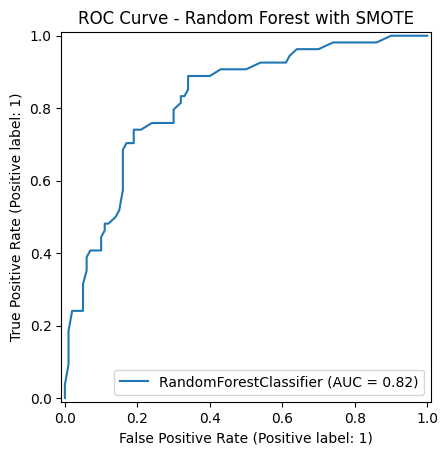

In [57]:
from sklearn.metrics import RocCurveDisplay

# Plot the ROC curve for the final model
RocCurveDisplay.from_estimator(rf_model_smote, X_test, y_test)
plt.title('ROC Curve - Random Forest with SMOTE')
plt.show()

**Key Insights from the ROC Curve:**
- The **AUC score of 0.82** means the model has an **82%** chance of correctly distinguishing between a randomly chosen diabetes-positive case and a non-diabetes case.
- The curve shows a good balance between the **true positive rate** and the **false positive rate**, which confirms that the model is making accurate predictions while limiting the number of false positives.